6. Time Series Analysis-
a. Checking Stationary
b. Converting a non-stationary data to stationary
c. Implementing Dickey Fuller Test
d. Plot ACF and PACF
e. Generating the ARIMA plot
f. TSA Forecasting

In [2]:
import pandas as pd

# Load the climate data
df = pd.read_csv('data/DailyDelhiClimate.csv', parse_dates=['date'], index_col='date')

# Display the first few rows
print(df.head())


             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000


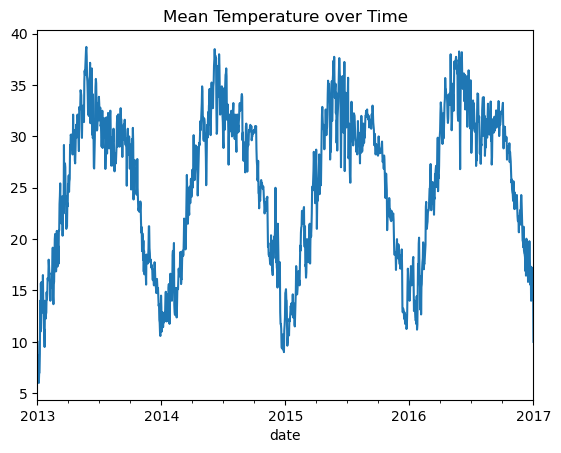

In [3]:
import matplotlib.pyplot as plt

# Plot the time series data (e.g., meantemp)
df['meantemp'].plot(title='Mean Temperature over Time')
plt.show()


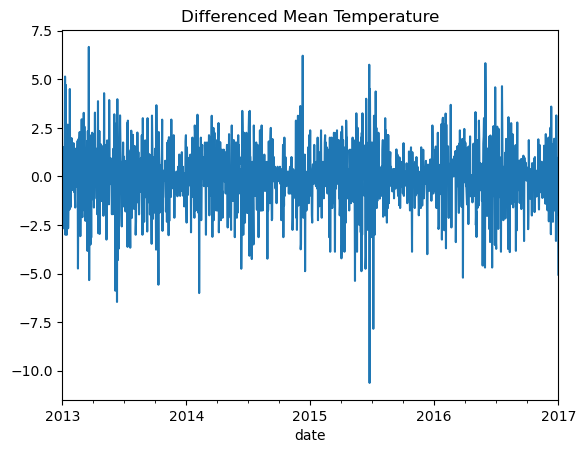

In [4]:
# Differencing the data to remove trends and make it stationary
df['meantemp_diff'] = df['meantemp'].diff().dropna()

# Plot the differenced data
df['meantemp_diff'].plot(title='Differenced Mean Temperature')
plt.show()


In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform the Dickey-Fuller test on the differenced series
result = adfuller(df['meantemp'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -2.0210690559206728
p-value: 0.27741213723016056


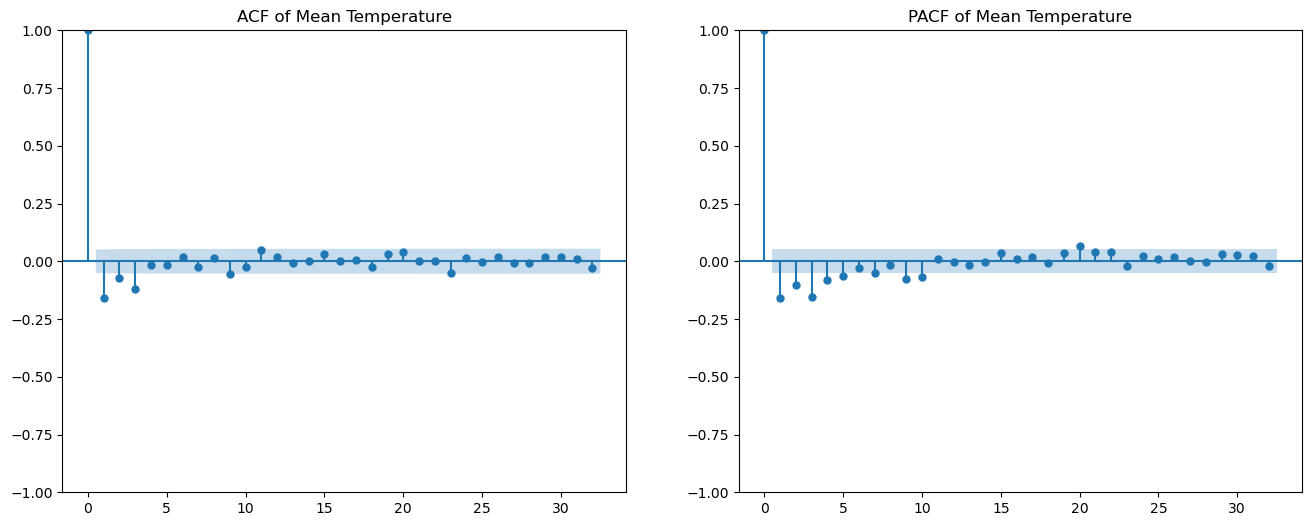

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced series
fig, ax = plt.subplots(1, 2, figsize=(16,6))

plot_acf(df['meantemp_diff'].dropna(), ax=ax[0])
ax[0].set_title('ACF of Mean Temperature')

plot_pacf(df['meantemp_diff'].dropna(), ax=ax[1])
ax[1].set_title('PACF of Mean Temperature')

plt.show()

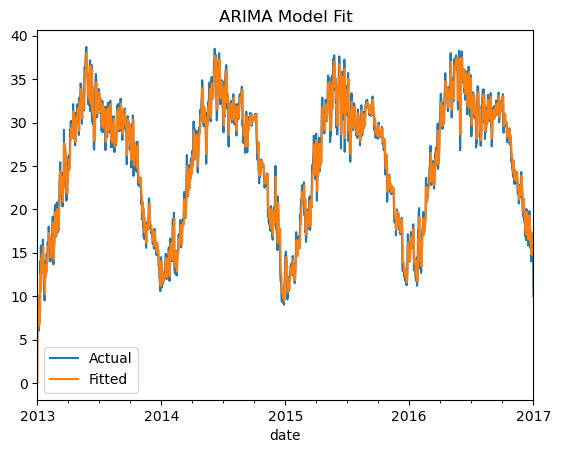

In [11]:
from statsmodels.tsa.arima.model import ARIMA

df.index = pd.to_datetime(df.index)
df = df.asfreq('D')

# Fit ARIMA model
model = ARIMA(df['meantemp'].dropna(), order=(1, 1, 1))  # (p,d,q) - change based on ACF/PACF
model_fit = model.fit()

# Plot the fitted values vs actual values
df['meantemp'].plot(label='Actual', legend=True)
model_fit.fittedvalues.plot(label='Fitted', legend=True)
plt.title('ARIMA Model Fit')
plt.show()


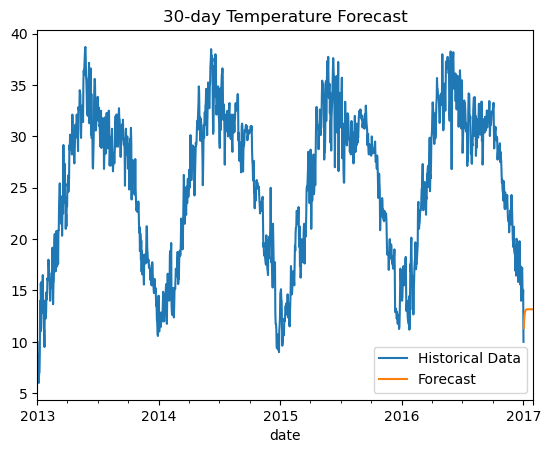

In [12]:
# Forecast future values
forecast = model_fit.forecast(steps=30)  # Forecast for next 30 days

# Plot the forecast
df['meantemp'].plot(label='Historical Data', legend=True)
forecast.plot(label='Forecast', legend=True)
plt.title('30-day Temperature Forecast')
plt.show()
